# **Projeto calcular risco de portfólio de ações**

### Importando bibliotecas Python 

In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns

>Buscando ações na base de dados da Bolsa

In [2]:
busca_acoes = ['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'RENT3.SA', 'BRFS3.SA','BOVA11.SA']
dataset2024 = pd.DataFrame()
for acao in busca_acoes:
    dataset2024[acao] = yf.download(acao, start= '2020-1-1')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


> Visualizando as ações no período requerido:

In [3]:
dataset2024

,PETR4.SA,VALE3.SA,BBDC4.SA,RENT3.SA,BRFS3.SA,BOVA11.SA
Date,,,,,,
2020-01-02,30.700001,54.330002,28.181818,49.619999,35.880001,114.239998
2020-01-03,30.450001,53.930000,28.181818,48.900002,35.939999,113.800003
2020-01-06,30.809999,53.610001,27.678436,48.330002,35.570000,112.589996
2020-01-07,30.690001,54.000000,27.197596,48.799999,35.160000,112.239998
2020-01-08,30.500000,54.009998,26.776859,48.560001,36.509998,111.949997
...,...,...,...,...,...,...
2024-01-16,38.099998,70.620003,15.730000,60.279999,13.030000,125.489998
2024-01-17,37.880001,69.349998,15.760000,60.939999,12.570000,124.529999
2024-01-18,37.730000,69.000000,15.670000,59.360001,12.410000,123.559998


> Renomeando colunas:

In [4]:
dataset2024 = dataset2024.rename(columns={'PETR4.SA': 'PETROBRAS', 'VALE3.SA': 'VALE', 'BBDC4.SA': 'BRADESCO', 'RENT3.SA': 'RENTACAR', 'BRFS3.SA': 'BRFOOD', 'BOVA11.SA': 'BOVA'})
dataset2024

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
Date,,,,,,
2020-01-02,30.700001,54.330002,28.181818,49.619999,35.880001,114.239998
2020-01-03,30.450001,53.930000,28.181818,48.900002,35.939999,113.800003
2020-01-06,30.809999,53.610001,27.678436,48.330002,35.570000,112.589996
2020-01-07,30.690001,54.000000,27.197596,48.799999,35.160000,112.239998
2020-01-08,30.500000,54.009998,26.776859,48.560001,36.509998,111.949997
...,...,...,...,...,...,...
2024-01-16,38.099998,70.620003,15.730000,60.279999,13.030000,125.489998
2024-01-17,37.880001,69.349998,15.760000,60.939999,12.570000,124.529999
2024-01-18,37.730000,69.000000,15.670000,59.360001,12.410000,123.559998


> Verificando se há ações nulas:

In [5]:
dataset2024.isnull().sum()

PETROBRAS    0
VALE         0
BRADESCO     0
RENTACAR     0
BRFOOD       0
BOVA         0
dtype: int64

*Obs.: Não foram localizadas ações nulas!*
________________________________________________________________________________________________________________________________________________________________ 

> Salvando os dados em arquivo .csv

In [6]:
dataset2024.to_csv('acoes.csv')

> Lendo o arquivo 'acoes.csv'...

In [7]:
dataset2024 = pd.read_csv('acoes.csv')
dataset2024

,Date,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,2020-01-02,30.700001,54.330002,28.181818,49.619999,35.880001,114.239998
1,2020-01-03,30.450001,53.930000,28.181818,48.900002,35.939999,113.800003
2,2020-01-06,30.809999,53.610001,27.678436,48.330002,35.570000,112.589996
3,2020-01-07,30.690001,54.000000,27.197596,48.799999,35.160000,112.239998
4,2020-01-08,30.500000,54.009998,26.776859,48.560001,36.509998,111.949997
...,...,...,...,...,...,...,...
1003,2024-01-16,38.099998,70.620003,15.730000,60.279999,13.030000,125.489998
1004,2024-01-17,37.880001,69.349998,15.760000,60.939999,12.570000,124.529999
1005,2024-01-18,37.730000,69.000000,15.670000,59.360001,12.410000,123.559998
1006,2024-01-19,37.529999,68.099998,15.640000,60.090000,13.000000,123.839996


> Verificando a quantidade de registros:

In [8]:
dataset2024.shape

(1008, 7)

> Efetuando a exclusão da coluna 'Date' 

In [10]:
dataset2024.drop(labels=['Date'], axis=1, inplace=True)
dataset2024

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,30.700001,54.330002,28.181818,49.619999,35.880001,114.239998
1,30.450001,53.930000,28.181818,48.900002,35.939999,113.800003
2,30.809999,53.610001,27.678436,48.330002,35.570000,112.589996
3,30.690001,54.000000,27.197596,48.799999,35.160000,112.239998
4,30.500000,54.009998,26.776859,48.560001,36.509998,111.949997
...,...,...,...,...,...,...
1003,38.099998,70.620003,15.730000,60.279999,13.030000,125.489998
1004,37.880001,69.349998,15.760000,60.939999,12.570000,124.529999
1005,37.730000,69.000000,15.670000,59.360001,12.410000,123.559998
1006,37.529999,68.099998,15.640000,60.090000,13.000000,123.839996


> Calculando taxas de retorno simples anuais

In [13]:
taxa_retorno = (dataset2024 / dataset2024.shift(1)) - 1
taxa_retorno

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.008143,-0.007362,0.000000,-0.014510,0.001672,-0.003851
2,0.011823,-0.005934,-0.017862,-0.011656,-0.010295,-0.010633
3,-0.003895,0.007275,-0.017372,0.009725,-0.011527,-0.003109
4,-0.006191,0.000185,-0.015470,-0.004918,0.038396,-0.002584
...,...,...,...,...,...,...
1003,-0.012442,-0.012998,-0.008822,-0.014711,-0.007616,-0.018229
1004,-0.005774,-0.017984,0.001907,0.010949,-0.035303,-0.007650
1005,-0.003960,-0.005047,-0.005711,-0.025927,-0.012729,-0.007789
1006,-0.005301,-0.013044,-0.001914,0.012298,0.047542,0.002266


> Correlação entre as ações:

In [14]:
taxa_retorno.cov()

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
PETROBRAS,0.000977,0.000371,0.000406,0.000418,0.000360,0.000393
VALE,0.000371,0.000656,0.000250,0.000238,0.000198,0.000284
BRADESCO,0.000406,0.000250,0.000612,0.000405,0.000338,0.000338
RENTACAR,0.000418,0.000238,0.000405,0.000951,0.000423,0.000391
BRFOOD,0.000360,0.000198,0.000338,0.000423,0.001198,0.000313
BOVA,0.000393,0.000284,0.000338,0.000391,0.000313,0.000315


> Obs.: Como os valores das ações são muito pequenos efetua-se o calculo das correlações conforme o código abaixo...

Calculo das correlações:

Tabela utilizada para verificar a correlação entre as ações tanto de empresas de nichos diferentes quanto iguais

In [15]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
taxa_retorno.corr()

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
PETROBRAS,1.000000,0.463397,0.524713,0.433315,0.332368,0.707371
VALE,0.463397,1.000000,0.395166,0.301768,0.223348,0.624931
BRADESCO,0.524713,0.395166,1.000000,0.530350,0.394289,0.769689
RENTACAR,0.433315,0.301768,0.530350,1.000000,0.395932,0.713338
BRFOOD,0.332368,0.223348,0.394289,0.395932,1.000000,0.508720
BOVA,0.707371,0.624931,0.769689,0.713338,0.508720,1.000000


Gráfico de correlação de ações:

> Obs.: Verifica a correlação entre as ações indicando as fortes das fracas

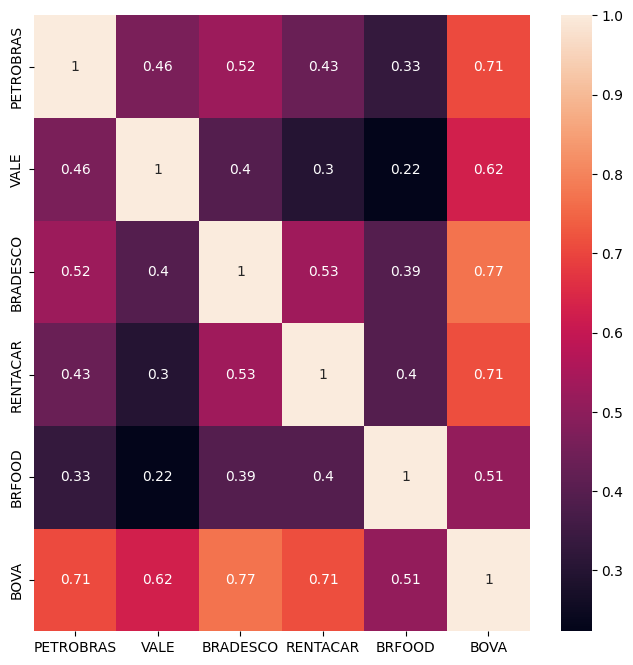

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(taxa_retorno.corr(), annot=True);

# **Risco de portifólio de ações**

In [20]:
taxa_retorno

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.008143,-0.007362,0.000000,-0.014510,0.001672,-0.003851
2,0.011823,-0.005934,-0.017862,-0.011656,-0.010295,-0.010633
3,-0.003895,0.007275,-0.017372,0.009725,-0.011527,-0.003109
4,-0.006191,0.000185,-0.015470,-0.004918,0.038396,-0.002584
...,...,...,...,...,...,...
1003,-0.012442,-0.012998,-0.008822,-0.014711,-0.007616,-0.018229
1004,-0.005774,-0.017984,0.001907,0.010949,-0.035303,-0.007650
1005,-0.003960,-0.005047,-0.005711,-0.025927,-0.012729,-0.007789
1006,-0.005301,-0.013044,-0.001914,0.012298,0.047542,0.002266


> Definindo pesos para todas as ações menos para 'BOVA'

In [21]:
dataset2024.columns

Index(['PETROBRAS', 'VALE', 'BRADESCO', 'RENTACAR', 'BRFOOD', 'BOVA'], dtype='object')

>Obs.: O intuito é calcularmos o risco de investir em uma carteira de ações individuais, para verificar se o risco é maior ou menor, do que fazer investimento diretamente no indice Ibovespa.

In [22]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [23]:
# Lembrando que a soma do peso das ações tem que ter o resultado de 1.0...
pesos1.sum()

1.0

> Gerando a matriz de covariância anual:

In [25]:
taxa_retorno.cov() * 246

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
PETROBRAS,0.240390,0.091263,0.099832,0.102768,0.088449,0.096574
VALE,0.091263,0.161348,0.061596,0.058634,0.048694,0.069899
BRADESCO,0.099832,0.061596,0.150584,0.099552,0.083046,0.083169
RENTACAR,0.102768,0.058634,0.099552,0.233989,0.103952,0.096084
BRFOOD,0.088449,0.048694,0.083046,0.103952,0.294600,0.076887
BOVA,0.096574,0.069899,0.083169,0.096084,0.076887,0.077537


> Calculando a covariância:

In [26]:
# Efetuando calculo para multiplicar as matrizes com os pesos. 
np.dot(taxa_retorno.cov() * 246, pesos1)

array([0.12454035, 0.08430695, 0.0989218 , 0.11977928, 0.12374842,
       0.08452228])